### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import time

### Import dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/Attrition_LDA.csv')
#data = pd.read_csv('C:/Users/mrshu/Downloads/Attrition_LDA.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The above data consists of a dependent variable Attrition and others as independent variables. Exploring the data would provide explain which model to use.

# Data Exploration

### Correlation heatmap

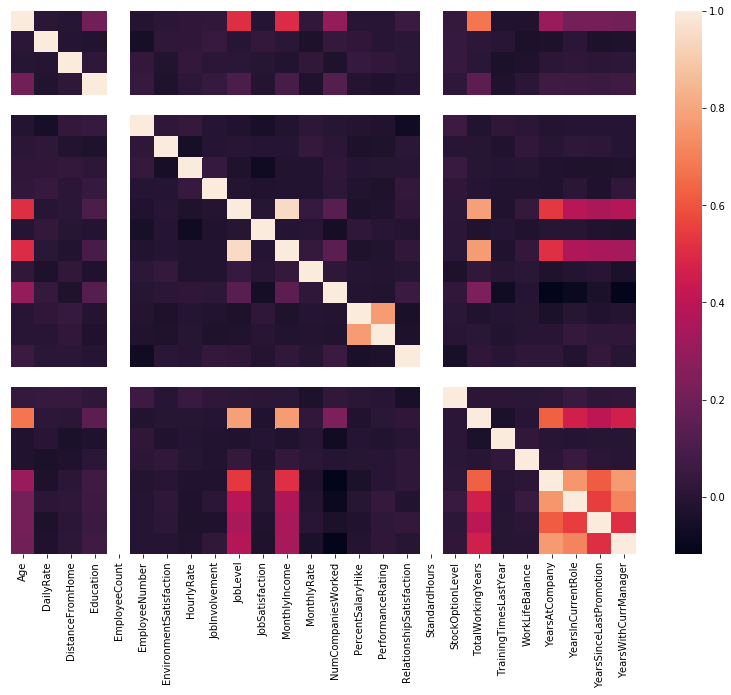

In [3]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),yticklabels=False,cbar=True,linewidths=0)
plt.show()

In [4]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [5]:
corr1 = data.corr().abs()
corr1[corr1 == 1] = 0
corr_cols = corr1.unstack().sort_values(ascending=False).drop_duplicates()

corr_df = pd.DataFrame(corr_cols[corr_cols > 0.75])
corr_df

,,0
MonthlyIncome,JobLevel,0.950300
TotalWorkingYears,JobLevel,0.782208
PercentSalaryHike,PerformanceRating,0.773550
TotalWorkingYears,MonthlyIncome,0.772893
YearsWithCurrManager,YearsAtCompany,0.769212
YearsInCurrentRole,YearsAtCompany,0.758754


The above data shows there is a severe correlation in the data. Dropping these features may cause to lose enough information. We will try using decomposition to solve this problem.

### Kernel Density distribution of Daily Rate against EducationalField.

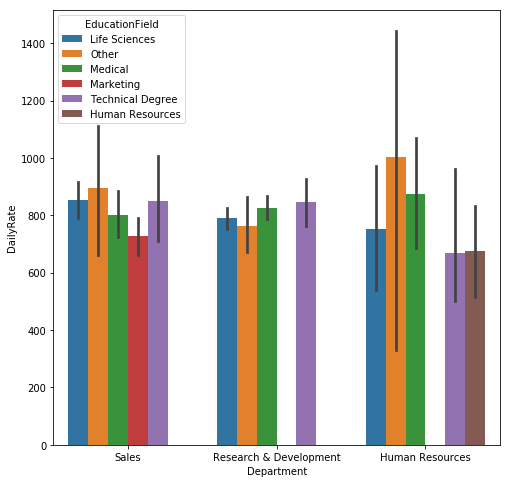

In [6]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Department'],y=data['DailyRate'],hue=data['EducationField'])
plt.show()

### Visualize count of Yes and No in the Attrition variable.

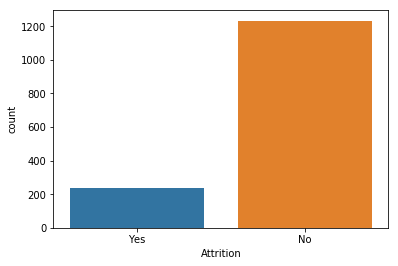

In [7]:
sns.countplot(data['Attrition'])
plt.show()

### Check the columns present in the dataset

In [8]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Feature Engineering

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

<b> From the above, we can see that there are 9 categorical data. Here we have to create dummy variables of them.</b>

In [10]:
BusinessTravel = pd.get_dummies(data['BusinessTravel'],drop_first=True)

In [11]:
Department = pd.get_dummies(data['Department'],drop_first=True)

In [12]:
EducationField = pd.get_dummies(data['EducationField'],drop_first=True)

In [13]:
Gender = pd.get_dummies(data['Gender'],drop_first=True)

In [14]:
JobRole  = pd.get_dummies(data['JobRole'],drop_first=True)

In [15]:
MaritalStatus = pd.get_dummies(data['MaritalStatus'],drop_first=True)

In [16]:
Train = data

In [17]:
def StrToBin(a):
    if a == 'Yes':
        return 1
    else:
        return 0
    

In [18]:
def StrToBinb(a):
    if a == 'Y':
        return 1
    else:
        return 0
    

In [19]:
Train['Attrition']=Train['Attrition'].apply(StrToBin)
#one at a time

In [20]:
Train['OverTime']=Train['OverTime'].apply(StrToBin)

In [21]:
Train['Over18']=Train['Over18'].apply(StrToBinb)

In [22]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

### Dropping redundant variables

In [23]:
Train.drop(['Department','EducationField','Gender','BusinessTravel','JobRole','MaritalStatus','JobLevel'],axis=1,inplace=True)

### Concat the spliited data into one.

In [24]:
Train = pd.concat([Train,Department,EducationField,Gender,BusinessTravel,JobRole,MaritalStatus],axis=1)

In [25]:
Train.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Research & Development', 'Sales', 'Life Sciences', 'Marketing',
       'Medical', 'Other', 'Technical Degree', 'Male', 'Travel_Frequently',
       'Travel_Rarely', 'Human Resources', 'Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'Married', 'Single'],
      dtype='object')

As we can see, there are many features in this data. Removing the features might lose information. Instead of feature selection, We are going to extract features from this data using Linear Discriminant Analysis.

In [26]:
m = list(Train.columns)
n = list(filter(lambda t: t not in ['Attrition'], m))

### Preparing X 

In [27]:
X = Train[n]
#y=X.pop('Attrition')

### Preparing y

In [28]:
y = Train['Attrition']

#  BASE MODEL : Logistic Regression Only

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Standardizing the variables

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

<a id=section6></a>
### Modelling and prediction

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

0.13225221633911133


C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [32]:
y_pred = fit1.predict(X_test_sc)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

[[360  11]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       371
           1       0.74      0.44      0.55        70

    accuracy                           0.89       441
   macro avg       0.82      0.71      0.74       441
weighted avg       0.88      0.89      0.87       441



#  MODEL 0: LDA only

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [36]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [37]:
lda_0 = LDA()
lda_0.fit(X_train_sc, y_train)
y_test_pred_0 = lda_0.predict(X_test_sc)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm_0 = confusion_matrix(y_test, y_test_pred_0)
cr_0 = classification_report(y_test, y_test_pred_0)

In [39]:
print(cm_0)
print(cr_0)

[[360  11]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       371
           1       0.74      0.44      0.55        70

    accuracy                           0.89       441
   macro avg       0.82      0.71      0.74       441
weighted avg       0.88      0.89      0.87       441



#  MODEL 1: LDA + Logistic Regression

#### Applying LDA

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [41]:
lda = LDA(n_components = 2)
X_train_1 = lda.fit_transform(X_train_sc, y_train)
X_test_1 = lda.transform(X_test_sc)

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(47, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


#### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1) #euc method
start_time = time.time()
fit1 = classifier.fit(X_train_1, y_train)
end_time = time.time()
time3 = end_time-start_time
print(time3)

0.008016347885131836


In [43]:
y_pred = fit1.predict(X_test_1)

#### Confusion Matrix and Classification Report

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
cm_1 = confusion_matrix(y_test, y_pred)
cr_1 = classification_report(y_test, y_pred)

In [45]:
print(cm_1)
print(cr_1)

[[360  11]
 [ 40  30]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.73      0.43      0.54        70

    accuracy                           0.88       441
   macro avg       0.82      0.70      0.74       441
weighted avg       0.87      0.88      0.87       441



<b>Applying LDA and then performing Logistic Regression gives us an accuracy score of 87%. 

<a id=section7></a>
### Computing time difference between two different logistic regression models created

In [46]:
time_diff = time3/time2
print(time_diff)

0.06061409106806128


<a id=section8></a>
## Applying KNN, SVM and Decision Tree and comparing using accuracy score

### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#will the split 80-20 or 70-30 change my F1 score? - Insignificant

<b>Applying LDA</b>

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [49]:
lda = LDA(n_components = 2,solver='eigen',shrinkage='auto')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(47, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


# Model 2: LDA + KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11,weights='distance',algorithm='brute')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [51]:
pred = knn.predict(X_test)

<b> Choosing the best K </b>

In [52]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

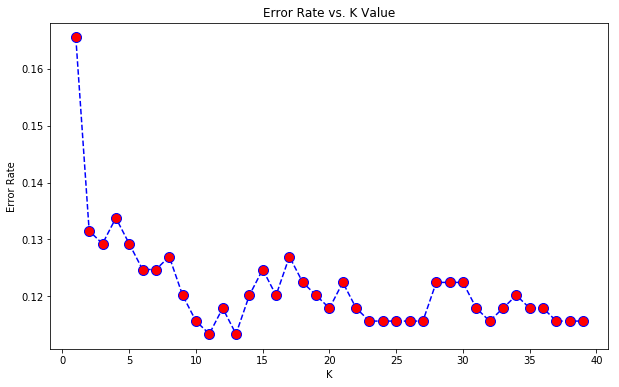

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<b> Report </b>

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[350  21]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       371
           1       0.60      0.44      0.51        70

    accuracy                           0.86       441
   macro avg       0.75      0.69      0.71       441
weighted avg       0.85      0.86      0.86       441



### Model Evaluation using accuracy score.

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.8639455782312925


--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#  MODEL 3: LDA + SVM

# Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<b> Applying LDA </b>

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(47, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [58]:
from sklearn.svm import SVC
model = SVC(C=100,kernel = 'rbf')
model.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
predictions = model.predict(X_test)

<b> Report </b>

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[360  11]
 [ 40  30]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.73      0.43      0.54        70

    accuracy                           0.88       441
   macro avg       0.82      0.70      0.74       441
weighted avg       0.87      0.88      0.87       441



In [61]:
print(accuracy_score(y_test, predictions))

0.8843537414965986


# MODEL 4: LDA + Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [63]:
dt = DTC(criterion='entropy',splitter='random')

In [64]:
tree = dt.fit(X_train,y_train)

In [65]:
pred_t = dt.predict(X_test)

In [66]:
cm = confusion_matrix(y_test,pred_t)

In [67]:
cr = classification_report(y_test,pred_t)

In [68]:
print(cm)
print(cr)

[[335  36]
 [ 35  35]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       371
           1       0.49      0.50      0.50        70

    accuracy                           0.84       441
   macro avg       0.70      0.70      0.70       441
weighted avg       0.84      0.84      0.84       441



In [69]:
print(accuracy_score(y_test, pred_t))

0.8390022675736961
